In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
# Numerical libraries
import numpy as np   

from sklearn.model_selection import train_test_split

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

In [2]:
mpg_df = pd.read_csv('C:/Users/Abhishek/Downloads/cars-dataset.csv')

In [3]:
mpg_df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [4]:
mpg_df.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [5]:
temp = pd.DataFrame(mpg_df.hp.str.isdigit()) 

temp[temp['hp'] == False]

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [6]:
mpg_df = mpg_df.replace('?', np.nan)

In [7]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          392 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [8]:
mpg_df['hp'] = mpg_df['hp'].astype('float64')

In [10]:
numeric_cols = mpg_df.drop('car name', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
car_names = pd.DataFrame(mpg_df[['car name']])


numeric_cols = numeric_cols.apply(lambda x: x.fillna(x.median()),axis=0)
mpg_df = numeric_cols.join(car_names)   # Recreating mpg_df by combining numerical columns with car names

mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
car name    398 non-null object
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


C:\Users\Abhishek\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Abhishek\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Abhishek\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Abhishek\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


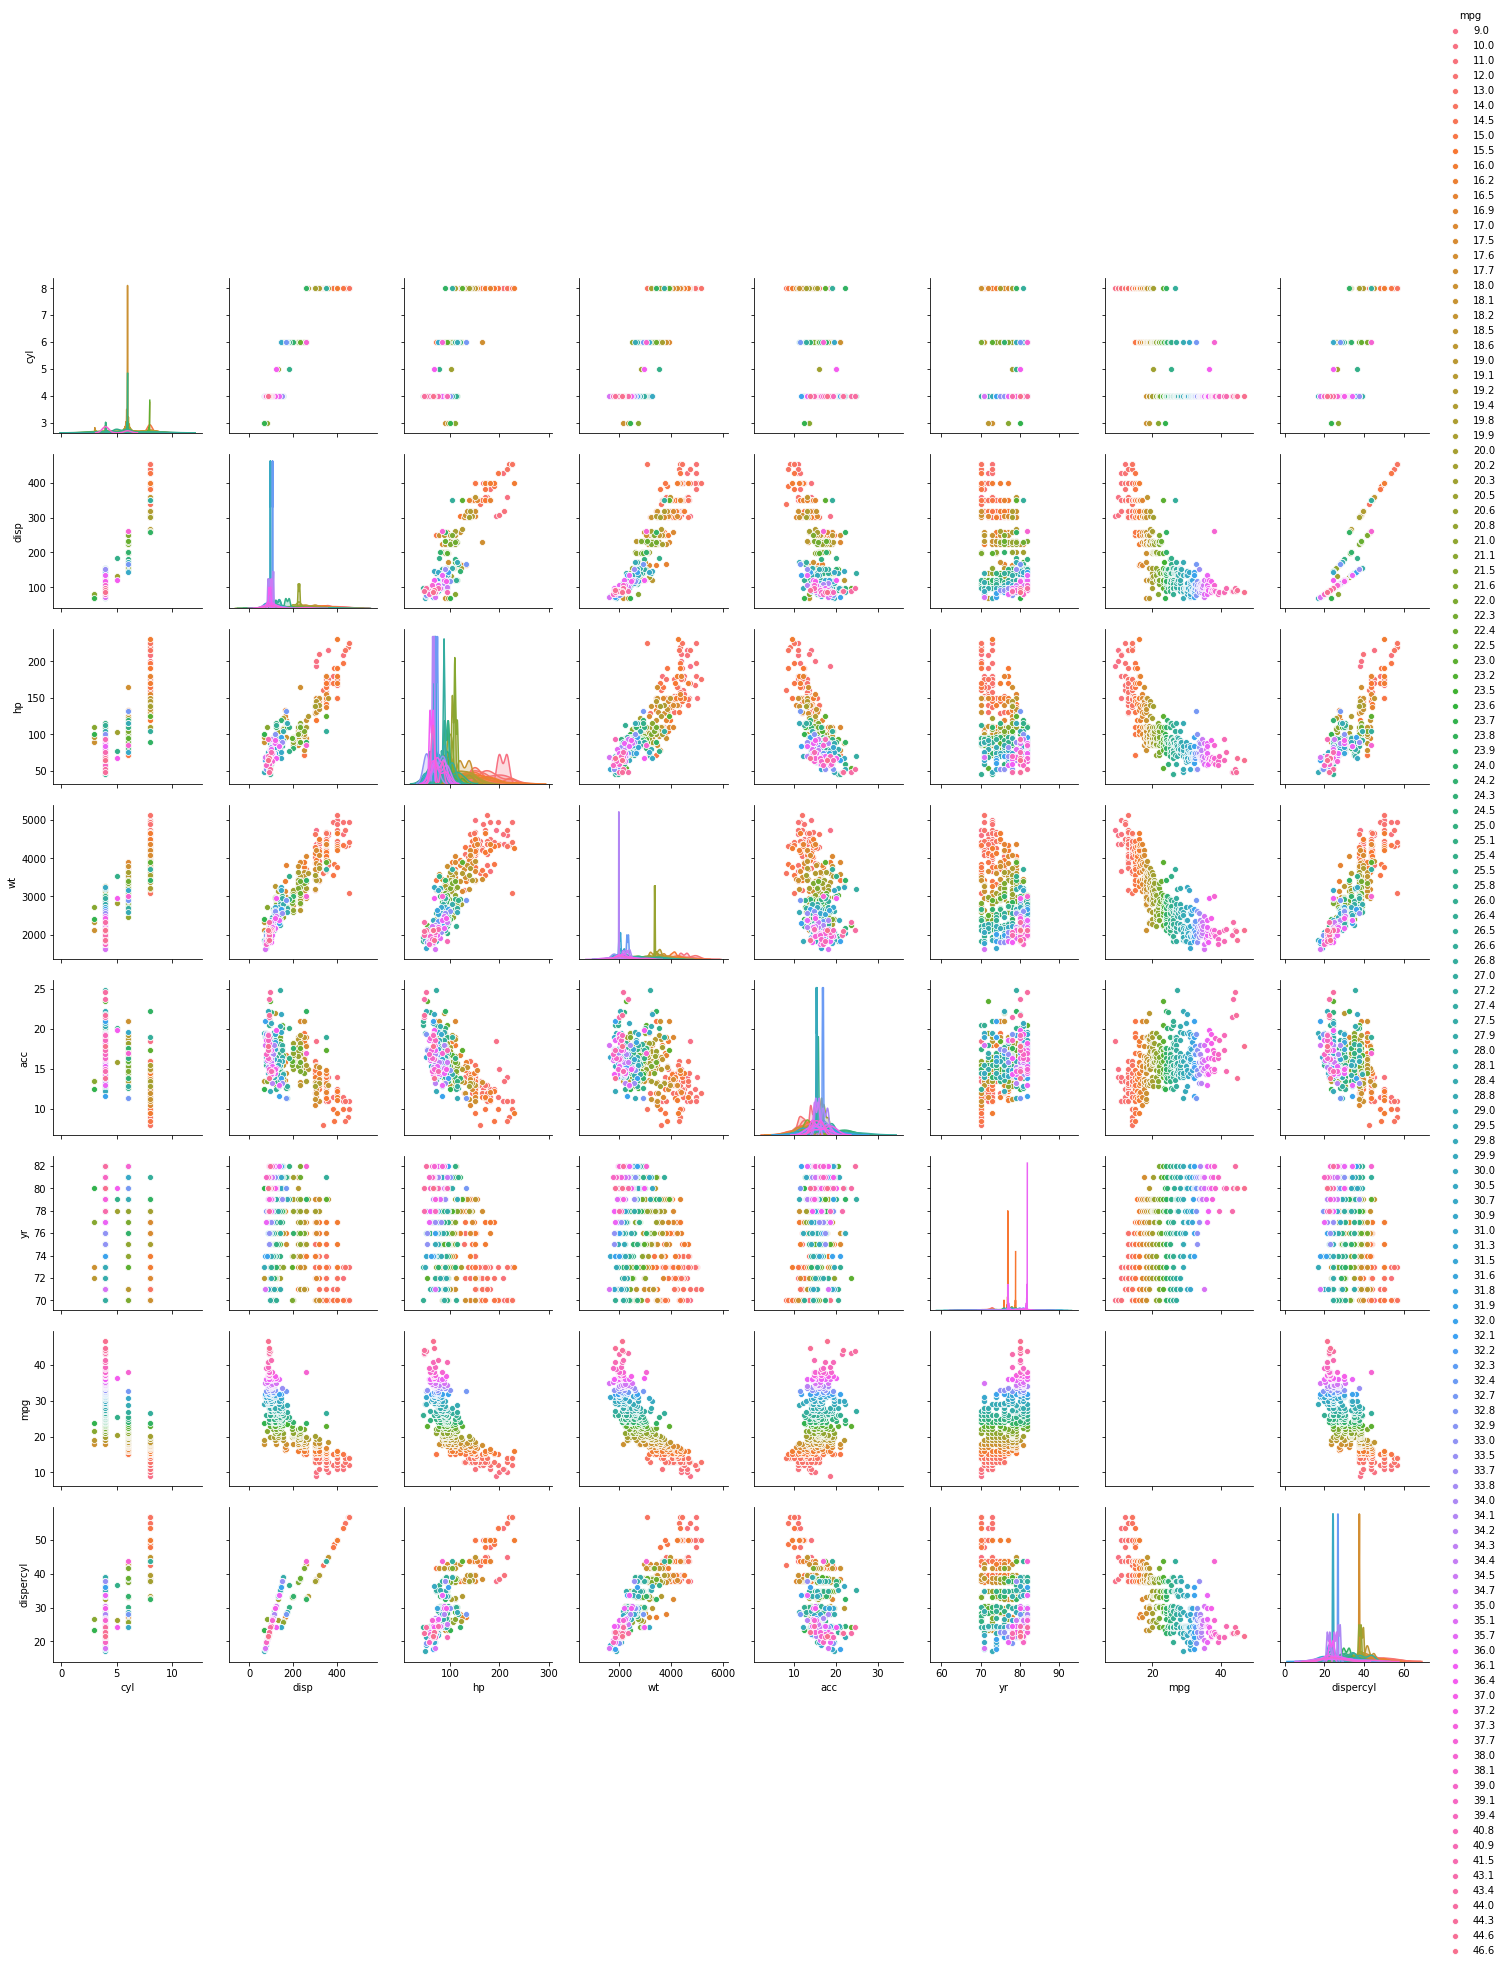

In [12]:
mpg_df_attr = mpg_df.iloc[:, 0:9]
mpg_df_attr['dispercyl'] = mpg_df_attr['disp'] / mpg_df_attr['cyl']
sns.pairplot(mpg_df_attr, diag_kind='kde', hue = 'mpg')   # to plot density curve instead of histogram


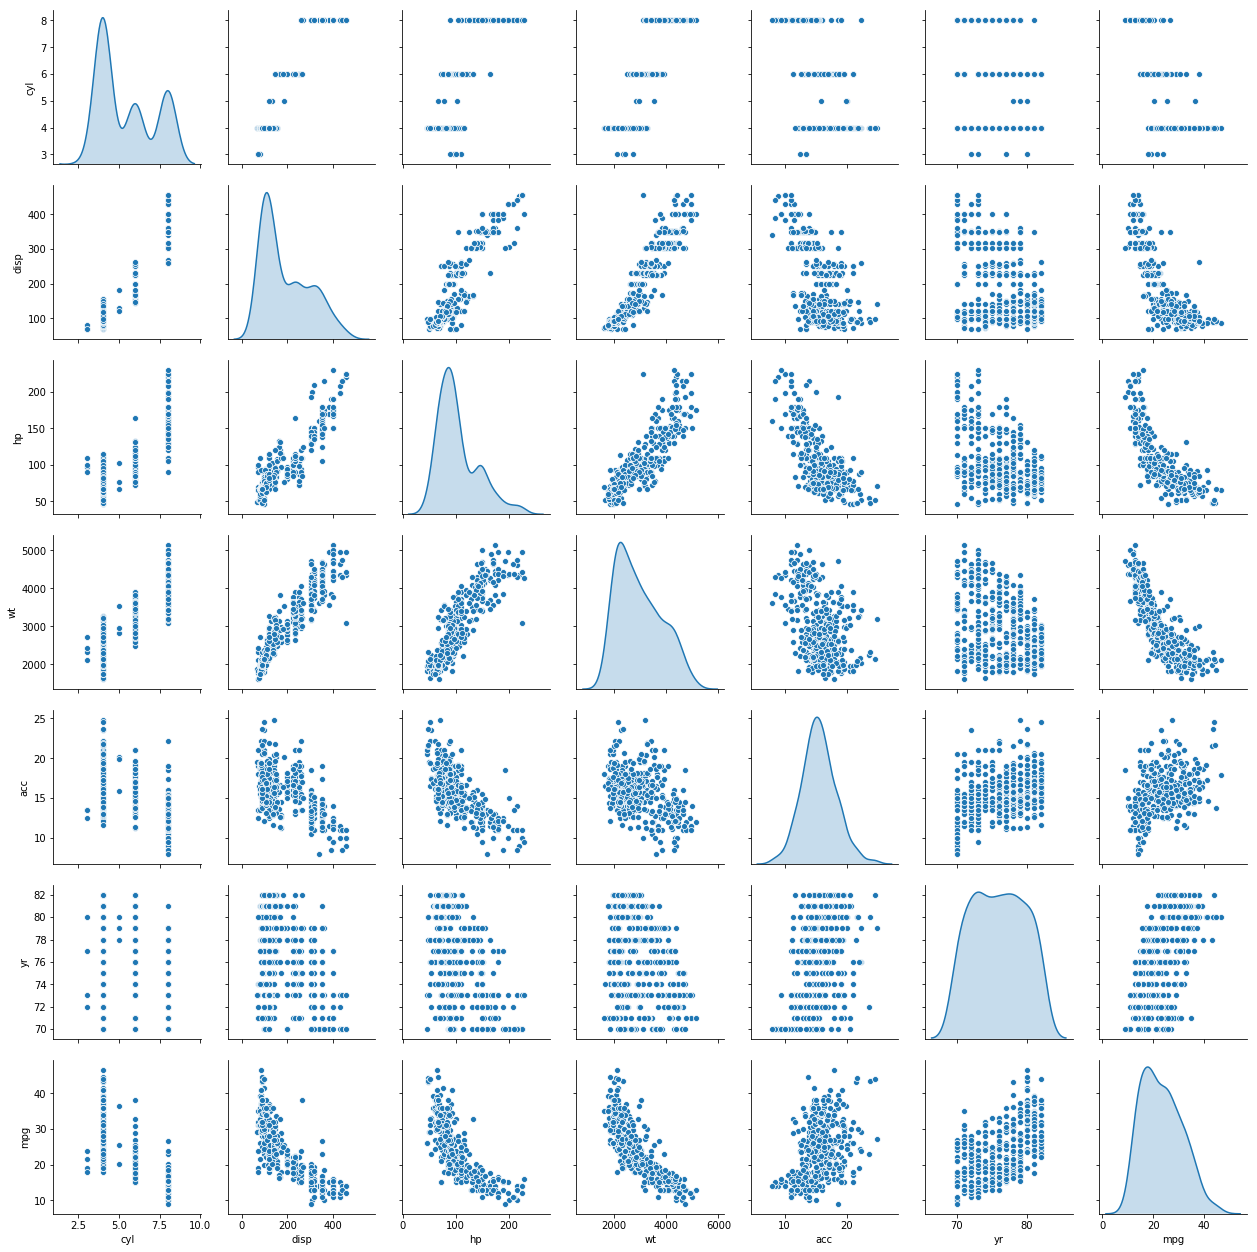

In [16]:
sns.pairplot(mpg_df, diag_kind ='kde')

In [26]:
from scipy import stats
from scipy.stats import zscore
Zscore_matrix = mpg_df.drop('car name', axis=1)
Zscore_matrix=Zscore_matrix.apply(stats.zscore)
Zscore_matrix.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.706439
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.090751
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.706439
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.962647
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.834543


In [28]:
from sklearn import metrics

cluster_range = range( 2, 10)   
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(Zscore_matrix)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  cluster_sil_scores.append(metrics.silhouette_score(Zscore_matrix, labels, metric='euclidean'))

# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors , "Avg Sil Score": cluster_sil_scores } )
clusters_df[0:15]

,num_clusters,cluster_errors,Avg Sil Score
0,2,1294.841895,0.482359
1,3,946.019791,0.353148
2,4,738.444300,0.347897
3,5,665.458528,0.316193
4,6,595.571911,0.277822
5,7,543.600723,0.276630
6,8,499.986122,0.267537
7,9,454.135407,0.265880


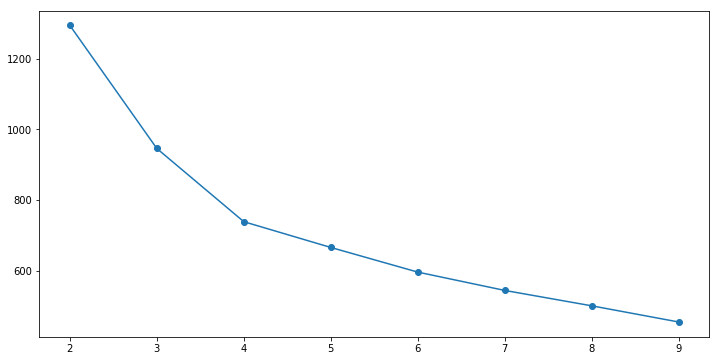

In [29]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [31]:
cluster = KMeans( n_clusters = 4, random_state = 2354 )
cluster.fit(Zscore_matrix)
Zscore_matrix_copy = Zscore_matrix.copy(deep = True)

In [32]:
centroids = cluster.cluster_centers_
centroids

array([[ 0.42443037,  0.30530323, -0.03775766,  0.33776539,  0.29367006,
         0.03298635, -0.49682681],
       [-0.82450284, -0.78042723, -0.74238037, -0.76525521,  0.38447752,
         1.12432606,  1.19411648],
       [ 1.49819126,  1.50392292,  1.52168282,  1.40409797, -1.0861486 ,
        -0.68832385, -1.16379715],
       [-0.86209143, -0.80905811, -0.56076487, -0.76253463,  0.32055871,
        -0.61862263,  0.21628669]])

In [33]:
centroid_df = pd.DataFrame(centroids, columns = list(Zscore_matrix) )
centroid_df

,cyl,disp,hp,wt,acc,yr,mpg
0,0.424430,0.305303,-0.037758,0.337765,0.293670,0.032986,-0.496827
1,-0.824503,-0.780427,-0.742380,-0.765255,0.384478,1.124326,1.194116
2,1.498191,1.503923,1.521683,1.404098,-1.086149,-0.688324,-1.163797
3,-0.862091,-0.809058,-0.560765,-0.762535,0.320559,-0.618623,0.216287


In [35]:
prediction=cluster.predict(Zscore_matrix)
Zscore_matrix["GROUP"] = prediction

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000201FE39FD68>,
      dtype=object)

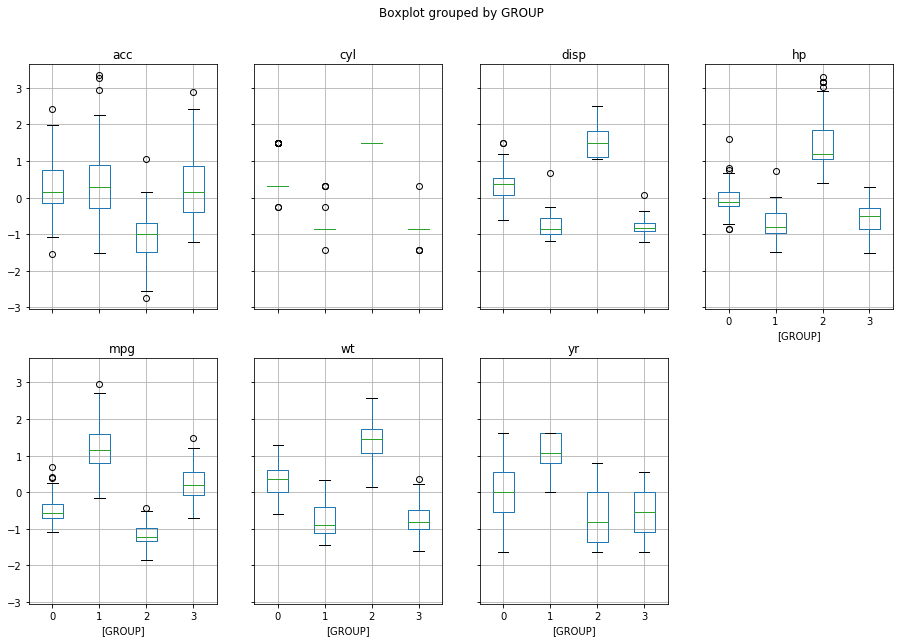

In [36]:
import matplotlib.pylab as plt

Zscore_matrix.boxplot(by = 'GROUP',  layout=(2,4), figsize=(15, 10))

# Linear Regression 

In [44]:
from scipy import stats
from scipy.stats import zscore
mpg_df_attr = mpg_df.drop('car name', axis=1)
mpg_df_attr_z=Zscore_matrix.apply(stats.zscore)
mpg_df_attr_z.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.706439
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.090751
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.706439
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.962647
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.834543


In [45]:
array = mpg_df_attr_z.values
X = array[:,1:5] # select all rows and first 4 columns which are the attributes
y = array[:,0]   # select all rows and the 0th column which is the classification "Yes", "No" for diabeties
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [46]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0 , max_depth=3)

regressor.fit(X_train , y_train)
feature_importances = regressor.feature_importances_


feature_names = mpg_df_attr.columns[1:7]
print(feature_names)

k = 8
top_k_idx = feature_importances.argsort()[-k:][::-1]
print(feature_names[top_k_idx], feature_importances)

Index(['disp', 'hp', 'wt', 'acc', 'yr', 'mpg'], dtype='object')
Index(['disp', 'hp', 'acc', 'wt'], dtype='object') [0.98536564 0.01463436 0.         0.        ]


In [47]:
y_pred = regressor.predict(X_test)

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
        
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 1, interaction_only=True)



X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

Ridge model: [ 0.          0.93913819  0.04234602 -0.01008769  0.01788235]
0.9125972849649
0.8817794784282591


In [50]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.          0.85449295  0.          0.         -0.        ]


In [51]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.901633546226985
0.8788422320889221


In [52]:
regression_model = LinearRegression()

regression_model.fit(X_train, y_train)

print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.9126089266790062
0.8814329287545154
